# Databricks Koalas

We will not cover the [installation](https://koalas.readthedocs.io/en/latest/?badge=latest) of Koalas on private environment not on older versions of Databricks environments. I would like to focus on similarities
between Pandas and Koalas.

## Import databricks.koalas  (DB Runtime => 7.1)

In [0]:
import databricks.koalas as ks
import pandas as pd
import numpy as np

## Object Creation

Creating a Koalas Series by passing a list of values, letting Koalas create a default integer index:

In [0]:
s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [0]:
s

Out[59]: 1 3.0
4 6.0
2 5.0
3 NaN
5 8.0
0 1.0
dtype: float64

Creating a Koalas DataFrame by passing a dict of objects that can be converted to series-like.

In [0]:
kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [0]:
kdf

,a,b,c
20,2,200,two
50,5,500,five
10,1,100,one
30,3,300,three
40,4,400,four
60,6,600,six


Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [0]:
dates = pd.date_range('20200807', periods=6)

In [0]:
dates

Out[63]: DatetimeIndex(['2020-08-07', '2020-08-08', '2020-08-09', '2020-08-10',
 '2020-08-11', '2020-08-12'],
 dtype='datetime64[ns]', freq='D')

In [0]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [0]:
pdf

,A,B,C,D
2020-08-07,0.583361,0.542618,1.684222,-0.867707
2020-08-08,1.067589,0.624555,-0.068942,1.344479
2020-08-09,-0.552111,-1.037478,0.594816,-1.351690
2020-08-10,0.102291,-0.022990,-1.241653,-0.378568
2020-08-11,-0.227934,0.021743,0.034619,-0.041365
2020-08-12,0.555649,0.704804,1.352279,-2.645881


Now, this pandas DataFrame can be converted to a Koalas DataFrame

In [0]:
kdf = ks.from_pandas(pdf)

In [0]:
type(kdf)

Out[67]: databricks.koalas.frame.DataFrame

It looks and behaves the same as a pandas DataFrame though

In [0]:
kdf

,A,B,C,D
2020-08-07,0.583361,0.542618,1.684222,-0.867707
2020-08-09,-0.552111,-1.037478,0.594816,-1.351690
2020-08-10,0.102291,-0.022990,-1.241653,-0.378568
2020-08-12,0.555649,0.704804,1.352279,-2.645881
2020-08-08,1.067589,0.624555,-0.068942,1.344479
2020-08-11,-0.227934,0.021743,0.034619,-0.041365


Also, it is possible to create a Koalas DataFrame from Spark DataFrame.  

Creating a Spark DataFrame from pandas DataFrame. 
Do not forget to import the Sparkpy package first.

In [0]:
from pyspark.sql import SparkSession

In [0]:
spark = SparkSession.builder.getOrCreate()

In [0]:
sdf = spark.createDataFrame(pdf)

In [0]:
sdf.show()

+--------------------+--------------------+--------------------+--------------------+
 A| B| C| D|
+--------------------+--------------------+--------------------+--------------------+
 -1.1689549603641773| 0.7508652476167718| 1.7459969435539628| 0.845267896374577|
 -0.3923045401153845| 0.5086411203060197|-0.11787383907584141| 0.07510514651050416|
 -0.3425318608882094| -2.035189349859852| -1.817620326316709| 1.3013570006265254|
 1.7771847598360662|-0.17698317337089955| 1.0373693533342232| 0.6462652119385413|
-0.14557249096743005| 0.01917569550099388|-0.34679740225680733| 0.3344519324746689|
 0.539892399712819| 0.1573278558945495| -0.5348724510873413| -0.719043357398834|
0.024282063754262298| -1.5312536427531263| 1.1881621496039996| 0.2298607936363347|
 -1.108792347206274| -1.1751415776415328| 0.3061500844016105| 1.0104386820455036|
 1.8818756229022195| -1.078588339799867| 0.7004485860842163|0.023512739813084983|
 0.2687568964797834| 0.13617593771084893|-0.03640706023098078| -1.340351008623156|
-0.44554910630672245| 1.4176558266443475| 0.4618036848788153| 1.2698683188492514|
 1.1658900230759883| -1.7216877132012105| -1.4657419778414131| 0.5833060685701208|
-0.18454750123495928| -0.5666327735989798| -0.5118053290396264| 0.3196865714675734|
 1.9709400502455703|-0.05201957510144157| 1.0850428095122622| 0.12695484743782062|
 -1.1023818661785088| -2.2355970650008783| 1.4616618143640576| 0.2894082015736548|
 0.13994698907257003| -0.7177851025890001| 0.2925888516528143| 1.576700600186025|
 -0.8321144992916357| 0.5777443201191999| -0.9898282954575567| 0.7482598338908605|
 -2.6058763688454234|-0.28865812329256907| 0.7341661089432205|-0.27367320943249174|
 -0.379286671488342| 0.3350363365123907| -1.0882484478415055| -1.5938673131103984|
 0.25545299095513463| 0.872721918358289| -0.4600385986046792| 0.06078452485921349|
+--------------------+--------------------+--------------------+--------------------+
only showing top 20 rows

Creating Koalas DataFrame from Spark DataFrame.
`to_koalas()` is automatically attached to Spark DataFrame and available as an API when Koalas is imported.

In [0]:
kdf = sdf.to_koalas()

In [0]:
kdf

,A,B,C,D
0,-1.168955,0.750865,1.745997,0.845268
1,-0.392305,0.508641,-0.117874,0.075105
2,-0.342532,-2.035189,-1.817620,1.301357
3,1.777185,-0.176983,1.037369,0.646265
4,-0.145572,0.019176,-0.346797,0.334452
5,0.539892,0.157328,-0.534872,-0.719043
6,0.024282,-1.531254,1.188162,0.229861
7,-1.108792,-1.175142,0.306150,1.010439
8,1.881876,-1.078588,0.700449,0.023513
9,0.268757,0.136176,-0.036407,-1.340351


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes) . Types that are common to both Spark and pandas are currently supported.

In [0]:
kdf.dtypes

Out[118]: A float64
B float64
C float64
D float64
dtype: object

## Viewing Data

See the [API Reference](https://koalas.readthedocs.io/en/latest/reference/index.html).

See the top rows of the frame. The results may not be the same as pandas though: unlike pandas, the data in a Spark dataframe is not _ordered_, it has no intrinsic notion of index. When asked for the head of a dataframe, Spark will just take the requested number of rows from a partition. Do not rely on it to return specific rows, use `.loc` or `iloc` instead.

In [0]:
kdf.head()

,A,B,C,D
0,-1.168955,0.750865,1.745997,0.845268
1,-0.392305,0.508641,-0.117874,0.075105
2,-0.342532,-2.035189,-1.817620,1.301357
3,1.777185,-0.176983,1.037369,0.646265
4,-0.145572,0.019176,-0.346797,0.334452


Display the index, columns, and the underlying numpy data.

You can also retrieve the index; the index column can be ascribed to a DataFrame, see later

In [0]:
kdf.index

Out[120]: Int64Index([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
 ...
 990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
 dtype='int64', length=1000)

In [0]:
kdf.columns

Out[121]: Index(['A', 'B', 'C', 'D'], dtype='object')

In [0]:
kdf.to_numpy()

Out[122]: array([[-1.16895496, 0.75086525, 1.74599694, 0.8452679 ],
 [-0.39230454, 0.50864112, -0.11787384, 0.07510515],
 [-0.34253186, -2.03518935, -1.81762033, 1.301357 ],
 ...,
 [ 0.48210446, 0.49055358, 0.71267237, 0.78550583],
 [ 1.77878349, -0.46146581, -2.05455204, -0.96552458],
 [-1.08240801, -0.09045405, 1.71119032, 2.48669479]])

Describe shows a quick statistic summary of your data

In [0]:
kdf.describe()

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.009920,-0.004681,0.023628,0.003475
std,1.003006,0.985395,1.040173,1.044633
min,-2.772882,-2.908391,-3.225095,-3.048961
25%,-0.671414,-0.648423,-0.704327,-0.689532
50%,0.014792,-0.002291,-0.002662,0.042912
75%,0.666778,0.655109,0.712672,0.682784
max,3.455867,3.142860,3.968320,3.414681


Transposing your data

In [0]:
kdf.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
A,-1.168955,-0.392305,-0.342532,1.777185,-0.145572,0.539892,0.024282,-1.108792,1.881876,0.268757,-0.445549,1.

Sorting by its index

In [0]:
kdf.sort_index(ascending=False)

,A,B,C,D
999,-1.082408,-0.090454,1.711190,2.486695
998,1.778783,-0.461466,-2.054552,-0.965525
997,0.482104,0.490554,0.712672,0.785506
996,0.402057,-0.828160,0.188390,-2.196149
995,0.617641,1.209025,0.504898,-0.125836
994,-0.182782,0.127180,-0.839605,0.019768
993,-1.001949,-0.802500,2.030540,0.269547
992,0.390498,1.368460,0.598043,0.908591
991,-0.470776,0.381599,-0.221637,1.018450
990,-2.344912,1.328647,0.430847,0.095997


Sorting by value

In [0]:
kdf.sort_values(by='B')

,A,B,C,D
447,1.128656,-2.908391,-0.925697,0.393059
830,-1.121109,-2.748787,0.898811,0.505026
876,-1.764509,-2.670721,0.290943,-0.584411
122,-0.337821,-2.413428,-0.441535,-0.434722
380,-1.458167,-2.353751,-0.605591,-1.590635
136,-0.372814,-2.311614,-0.012529,0.359945
970,-0.506266,-2.309083,-0.803683,0.207802
823,-1.660016,-2.287133,-0.527486,2.347518
513,0.154795,-2.256850,1.292682,-0.435465
493,1.023877,-2.255477,0.523501,-0.787606


## Missing Data
Koalas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.

In [0]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [0]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [0]:
kdf1 = ks.from_pandas(pdf1)

In [0]:
kdf1

,A,B,C,D,E
2020-08-07,NaN,NaN,NaN,NaN,1.0
2020-08-08,NaN,NaN,NaN,NaN,1.0
2020-08-09,NaN,NaN,NaN,NaN,NaN
2020-08-10,NaN,NaN,NaN,NaN,NaN


To drop any rows that have missing data.

In [0]:
kdf1.dropna(how='any')

,A,B,C,D,E


Filling missing data.

In [0]:
kdf1.fillna(value=5)

,A,B,C,D,E
2020-08-07,5.0,5.0,5.0,5.0,1.0
2020-08-08,5.0,5.0,5.0,5.0,1.0
2020-08-09,5.0,5.0,5.0,5.0,5.0
2020-08-10,5.0,5.0,5.0,5.0,5.0


## Operations

### Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [0]:
kdf.mean()

Out[133]: A -0.009920
B -0.004681
C 0.023628
D 0.003475
dtype: float64

### Spark Configurations

Various configurations in PySpark could be applied internally in Koalas.
For example, you can enable Arrow optimization to hugely speed up internal pandas conversion. See <a href="https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html">PySpark Usage Guide for Pandas with Apache Arrow</a>.

In [0]:
prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ks.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [0]:
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ks.range(300000).to_pandas()

152 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [0]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ks.range(300000).to_pandas()

899 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [0]:
ks.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [0]:
kdf = ks.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [0]:
kdf

,A,B,C,D
0,foo,one,-0.195688,0.438772
2,foo,two,0.088328,0.620276
4,foo,two,-0.591908,-1.242472
6,foo,one,-0.015711,-1.242927
1,bar,one,0.891673,0.338502
3,bar,three,0.568165,-0.895269
5,bar,two,0.197930,-1.104852
7,foo,three,2.143721,-0.772440


Grouping and then applying the [sum()](https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.groupby.GroupBy.sum.html#databricks.koalas.groupby.GroupBy.sum) function to the resulting groups.

In [0]:
kdf.groupby('A').sum()

,C,D
A,,
foo,1.428742,-2.198790
bar,1.657768,-1.661618


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [0]:
kdf.groupby(['A', 'B']).sum()

C 
 D 
 
 
 A 
 B 
 
 
 
 
 
 
 foo 
 one 
 -0.211399 
 -0.804155 
 
 
 two 
 -0.503580 
 -0.622195 
 
 
 bar 
 one 
 0.891673 
 0.338502 
 
 
 three 
 0.568165 
 -0.895269 
 
 
 two 
 0.197930 
 -1.104852 
 
 
 foo 
 three 
 2.143721 
 -0.772440

## Plotting
See the <a href="https://koalas.readthedocs.io/en/latest/reference/frame.html#plotting">Plotting</a> docs.

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

In [0]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [0]:
kser = ks.Series(pser)

In [0]:
kser

Out[145]: 2000-05-05 -0.001496
2000-05-06 -0.985486
2000-05-07 0.678574
2000-05-08 0.080573
2000-05-09 -1.659092
2000-05-10 -0.374485
2000-05-11 0.315821
2000-05-12 1.017100
2000-05-13 -0.881157
2000-05-14 -0.280571
2000-05-15 1.822038
2000-05-16 -0.668057
2000-05-17 0.849824
2000-05-18 1.278516
2000-05-19 -0.254421
2000-05-20 -0.603093
2000-05-21 0.818006
2000-05-22 0.917542
2000-05-23 -0.335695
2000-05-24 -1.061056
2000-05-25 0.528852
2000-05-26 1.661653
2000-05-27 -0.157660
2000-05-28 0.742193
2000-05-29 -0.912767
2000-05-30 0.796078
2000-05-31 0.529095
2000-06-01 0.093177
2000-06-02 -1.131457
2000-06-03 1.612177
2000-06-04 -0.008035
2000-06-05 -0.633636
2000-06-06 0.349028
2000-06-07 -0.049922
2000-06-08 0.920491
2000-06-09 0.068006
2000-06-10 1.239216
2000-06-11 0.616520
2000-06-12 -0.800194
2000-06-13 0.070613
2000-06-14 1.146916
2000-06-15 2.847496
2000-06-16 -1.929710
2000-06-17 1.909132
2000-06-18 0.782480
2000-06-19 0.041179
2000-06-20 0.001998
2000-06-21 0.051523
2000-06-22 0.526144
2000-06-23 -1.409124
2000-06-24 -0.773627
2000-06-25 1.007282
2000-06-26 1.112872
2000-06-27 -2.149857
2000-06-28 0.432252
2000-06-29 -0.954019
2000-06-30 -0.151208
2000-07-01 1.130932
2000-07-02 -0.385874
2000-07-03 -1.055666
2000-07-04 -0.214192
2000-07-05 2.576471
2000-07-06 0.247692
2000-07-07 0.507208
2000-07-08 0.179198
2000-07-09 0.949754
2000-07-10 -1.176673
2000-07-11 -2.495439
2000-07-12 0.675766
2000-07-13 0.621408
2000-07-14 1.700132
2000-07-15 0.420560
2000-07-16 -3.301244
2000-07-17 0.632372
2000-07-18 -1.380935
2000-07-19 -0.021695
2000-07-20 -0.152786
2000-07-21 0.195410
2000-07-22 -1.235685
2000-07-23 0.350628
2000-07-24 -0.227597
2000-07-25 -0.062314
2000-07-26 0.058387
2000-07-27 1.814800
2000-07-28 -0.090287
2000-07-29 -0.464926
2000-07-30 0.986764
2000-07-31 1.771904
2000-08-01 -0.569211
2000-08-02 -0.487328
2000-08-03 1.284979
2000-08-04 -0.663252
2000-08-05 0.741376
2000-08-06 0.369674
2000-08-07 -1.438175
2000-08-08 -0.847026
2000-08-09 0.498196
2000-08-10 1.397852
2000-08-11 -0.678516
2000-08-12 0.212195
2000-08-13 0.732891
2000-08-14 0.911255
2000-08-15 -0.408488
2000-08-16 1.682482
2000-08-17 -1.997510
2000-08-18 -0.334724
2000-08-19 -0.279490
2000-08-20 -0.474588
2000-08-21 -1.200565
2000-08-22 -1.429570
2000-08-23 -0.082287
2000-08-24 -0.387115
2000-08-25 -1.337309
2000-08-26 -0.271398
2000-08-27 0.379329
2000-08-28 0.597655
2000-08-29 -0.954191
2000-08-30 -1.512514
2000-08-31 0.389093
2000-09-01 0.757725
2000-09-02 1.753900
2000-09-03 -0.419369
2000-09-04 -1.187390
2000-09-05 -0.257212
2000-09-06 -0.264014
2001-01-10 1.909961
2001-01-11 -1.992564
2001-01-12 1.088992
2001-01-13 0.553623
2001-01-14 -0.162910
2001-01-15 -0.496477
2001-01-16 0.149752
2001-01-17 -0.974517
2001-01-18 0.553874
2001-01-19 -2.485042
2001-01-20 -0.354527
2001-01-21 0.575132
2001-01-22 0.140476
2001-01-23 0.868587
2001-01-24 0.204459
2001-01-25 0.295199
2001-01-26 -0.384031
2001-01-27 -0.926965
2001-01-28 -0.862408
2001-01-29 0.620847
2001-01-30 -0.895482
2001-01-31 -1.371121
2001-02-01 0.704605
2001-02-02 0.940264
2001-02-03 -0.640633
2001-02-04 -1.716585
2001-02-05 0.597010
2001-02-06 0.266033
2001-02-07 0.159443
2001-02-08 1.492858
2001-02-09 -3.135965
2001-02-10 0.270915
2001-02-11 -0.549269
2001-02-12 -0.076227
2001-02-13 -0.733701
2001-02-14 0.337788
2001-02-15 1.771738
2001-02-16 -1.082071
2001-02-17 0.299159
2001-02-18 0.449402
2001-02-19 0.982076
2001-02-20 -0.264792
2001-02-21 0.749414
2001-02-22 -0.472404
2001-02-23 1.529163
2001-02-24 -1.087186
2001-02-25 1.893381
2001-02-26 0.757955
2001-02-27 0.572268
2001-02-28 0.498214
2001-03-01 0.670162
2001-03-02 0.064708
2001-03-03 -0.003414
2001-03-04 1.266597
2001-03-05 -1.547018
2001-03-06 0.575525
2001-03-07 0.504701
2001-03-08 0.817666
2001-03-09 -0.736149
2001-03-10 1.218950
2001-03-11 -0.471057
2001-03-12 1.132037
2001-03-13 0.920150
2001-03-14 0.607657
2001-03-15 1.249268
2001-03-16 0.770045
2001-03-17 0.652989
2001-03-18 -1.455210
2001-03-19 -0.641420
2001-03-20 -1.187958
2

In [0]:
kser = kser.cummax()

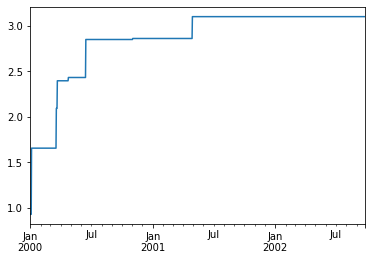

In [0]:
kser.plot()

On a DataFrame, the <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.frame.DataFrame.plot.html#databricks.koalas.frame.DataFrame.plot">plot()</a> method is a convenience to plot all of the columns with labels:

In [0]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [0]:
kdf = ks.from_pandas(pdf)

In [0]:
kdf = kdf.cummax()

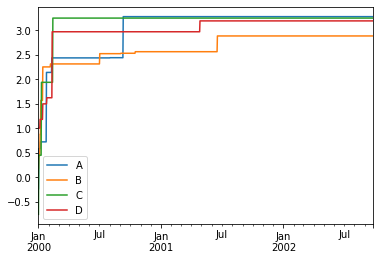

In [0]:
kdf.plot()

## Getting data in/out
See the <a href="https://koalas.readthedocs.io/en/latest/reference/io.html">Input/Output
</a> docs.

### CSV

CSV is straightforward and easy to use. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_csv.html#databricks.koalas.DataFrame.to_csv">here</a> to write a CSV file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_csv.html#databricks.koalas.read_csv">here</a> to read a CSV file.

In [0]:
kdf.to_csv('dbfs:/foo.csv')
ks.read_csv('dbfs:/foo.csv').head(10)

,A,B,C,D
0,-0.232398,0.181141,-0.754150,1.003101
1,0.584317,0.441597,0.450764,1.003101
2,0.584317,0.441597,0.450764,1.003101
3,0.584317,0.441597,0.450764,1.003101
4,0.584317,0.441597,0.450764,1.003101
5,0.584317,0.876558,0.450764,1.181848
6,0.723002,0.876558,0.450764,1.181848
7,0.723002,1.568746,0.450764,1.181848
8,0.723002,1.568746,0.450764,1.181848
9,0.723002,1.568746,1.937202,1.181848


### Parquet

Parquet is an efficient and compact file format to read and write faster. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_parquet.html#databricks.koalas.DataFrame.to_parquet">here</a> to write a Parquet file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_parquet.html#databricks.koalas.read_parquet">here</a> to read a Parquet file.

In [0]:
kdf.to_parquet('dbfs:/bar.parquet')
ks.read_parquet('dbfs:/bar.parquet').head(10)

,A,B,C,D
0,-0.232398,0.181141,-0.754150,1.003101
1,0.584317,0.441597,0.450764,1.003101
2,0.584317,0.441597,0.450764,1.003101
3,0.584317,0.441597,0.450764,1.003101
4,0.584317,0.441597,0.450764,1.003101
5,0.584317,0.876558,0.450764,1.181848
6,0.723002,0.876558,0.450764,1.181848
7,0.723002,1.568746,0.450764,1.181848
8,0.723002,1.568746,0.450764,1.181848
9,0.723002,1.568746,1.937202,1.181848


### Spark IO

In addition, Koalas fully support Spark's various datasources such as ORC and an external datasource.  See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_spark_io.html#databricks.koalas.DataFrame.to_spark_io">here</a> to write it to the specified datasource and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_spark_io.html#databricks.koalas.read_spark_io">here</a> to read it from the datasource.

In [0]:
kdf.to_spark_io('dbfs:/zoo.orc', format="orc")
ks.read_spark_io('dbfs:/zoo.orc', format="orc").head(10)

,A,B,C,D
0,-0.232398,0.181141,-0.754150,1.003101
1,0.584317,0.441597,0.450764,1.003101
2,0.584317,0.441597,0.450764,1.003101
3,0.584317,0.441597,0.450764,1.003101
4,0.584317,0.441597,0.450764,1.003101
5,0.584317,0.876558,0.450764,1.181848
6,0.723002,0.876558,0.450764,1.181848
7,0.723002,1.568746,0.450764,1.181848
8,0.723002,1.568746,0.450764,1.181848
9,0.723002,1.568746,1.937202,1.181848
